In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mai 19

@author: ChatGPT
"""

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

2025-05-28 15:54:09.965787: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-28 15:54:09.968572: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-28 15:54:09.975822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748440449.987137 2406298 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748440449.990480 2406298 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748440450.000392 2406298 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:


# Normalize the images to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension (grayscale = 1 channel)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [4]:
x_train.shape

(60000, 28, 28, 1)

Epoch 1/5


/home/yaning/.conda/envs/spike/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1747668203.252408 2352596 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
E0000 00:00:1747668203.255704 2352596 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1747668203.259329 2352596 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed proper

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8997 - loss: 0.3263 - val_accuracy: 0.9833 - val_loss: 0.0539
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9849 - loss: 0.0480 - val_accuracy: 0.9875 - val_loss: 0.0387
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9903 - val_loss: 0.0285
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9929 - loss: 0.0220 - val_accuracy: 0.9908 - val_loss: 0.0281
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9950 - loss: 0.0146 - val_accuracy: 0.9917 - val_loss: 0.0259
313/313 - 1s - 2ms/step - accuracy: 0.9917 - loss: 0.0259

Test accuracy: 0.9917


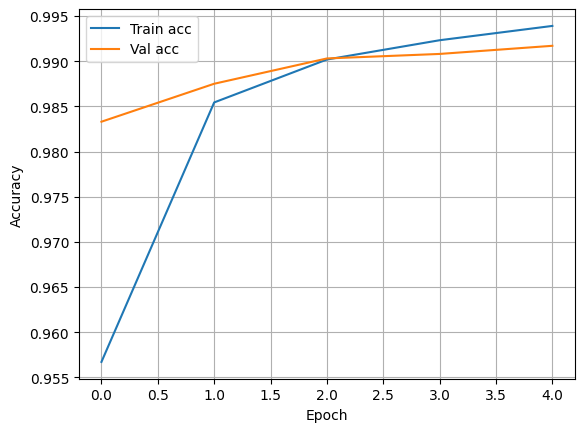

In [23]:


# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Get the convolution layer of one image

In [5]:
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [6]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Layer 0
    layers.MaxPooling2D((2, 2)),                                            # Layer 1
    layers.Conv2D(64, (3, 3), activation='relu'),                           # Layer 2
    layers.MaxPooling2D((2, 2))                                             # Layer 3
])

/home/yaning/.conda/envs/spike/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1748440465.806883 2406298 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
E0000 00:00:1748440465.809815 2406298 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1748440465.813036 2406298 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed proper

In [17]:
# Choose the layer outputs you want to observe
layer_outputs = [layer.output for layer in model.layers[:]]  # You can choose specific layers

# Create a model that maps input to these intermediate outputs
activation_model = Model(inputs=model.inputs, outputs=layer_outputs)

In [18]:


# Example image: shape (28, 28), already normalized (0–1)
sample_image = x_test[0]  # Pick a test image
sample_image = np.expand_dims(sample_image, axis=0)  # Add batch dimension
# Shape becomes (1, 28, 28)
sample_image = np.expand_dims(sample_image, axis=-1) # Add channel dimension
# Shape becomes (1, 28, 28, 1)

# Get activations
activations = activation_model.predict(sample_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/home/yaning/.conda/envs/spike/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 28, 28, 1, 1))
  warnings.warn(msg)


In [19]:
len(activations)

4

In [21]:
feature_maps.shape

(1, 5, 5, 64)

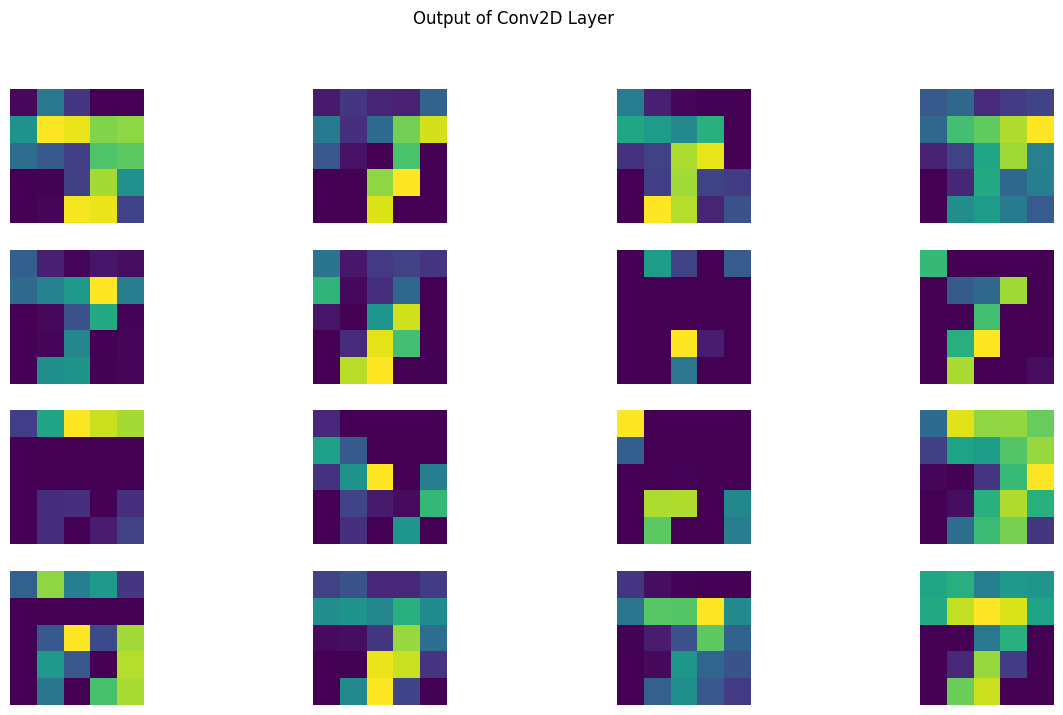

In [20]:


# Show the output of the first Conv2D layer (activations[0])
feature_maps = activations[-1]  # Shape: (1, H, W, 32)
num_filters = feature_maps.shape[-1]

plt.figure(figsize=(15, 8))
for i in range(min(num_filters, 16)):  # Show first 16 filters
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.suptitle("Output of Conv2D Layer")
plt.show()
